In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical




"""The to_categorical function is used to convert integer labels into one-hot encoded vectors.
One-hot encoding is a process where each integer label is transformed into a binary vector representation.
The vector has a length equal to the number of classes, and all elements are set to zero except for the
index corresponding to the label, which is set to one.
"""

In [ ]:
from keras.datasets import mnist
(training_dataset_x, training_dataset_y), (test_dataset_x, test_dataset_y)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
training_dataset_y=to_categorical(training_dataset_y)
test_dataset_y= to_categorical(test_dataset_y)

In [ ]:
print(training_dataset_x.shape, test_dataset_x.shape, training_dataset_y.shape)

(60000, 28, 28) (10000, 28, 28) (60000, 10)


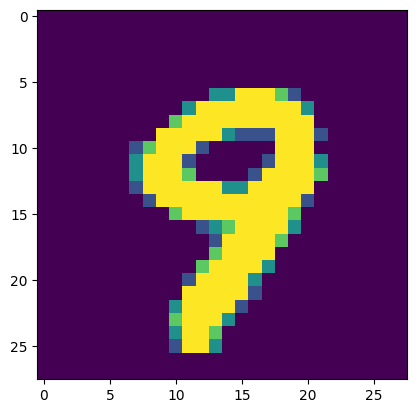

In [ ]:
plt.imshow(training_dataset_x[5999])

In [ ]:
training_dataset_x=training_dataset_x/255
test_dataset_x=test_dataset_x/255        # noramlization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
# create keras model and add the layers

model =Sequential (name ='mnist')
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128, activation ='relu', name='Hidden-1'))
model.add(Dense(36, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation ='softmax', name='Output'))

In [ ]:
model.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden-1 (Dense)            (None, 128)               100480    
                                                                 
 Hidden-2 (Dense)            (None, 36)                4644      
                                                                 
 Output (Dense)              (None, 10)                370       
                                                                 
Total params: 105,494
Trainable params: 105,494
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer ='Adam',  loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist= model.fit(training_dataset_x, training_dataset_y,epochs=10, validation_split=0.2 )

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.9176 - val_loss: 0.1395 - val_accuracy: 0.9589
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1178 - accuracy: 0.9652 - val_loss: 0.0995 - val_accuracy: 0.9698
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0829 - accuracy: 0.9745 - val_loss: 0.1246 - val_accuracy: 0.9628
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0626 - accuracy: 0.9808 - val_loss: 0.0863 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9852 - val_loss: 0.1001 - val_accuracy: 0.9706
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.0998 - val_accuracy: 0.9731
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0996 - val_accuracy:

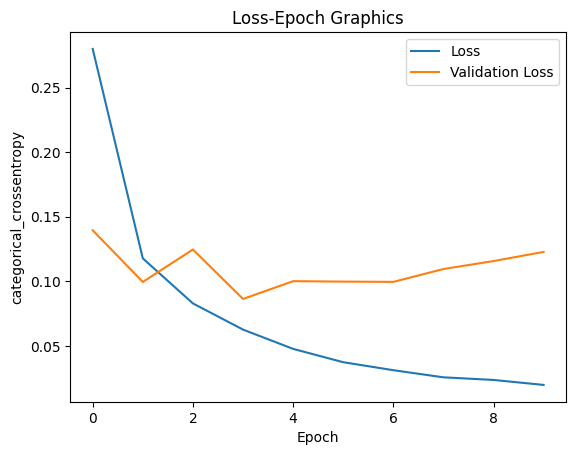

In [ ]:
plt.title('Loss-Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Loss','Validation Loss'])
plt.show()

In [ ]:
print(test_dataset_x.shape)
y_prob=model.predict(test_dataset_x)

(10000, 28, 28)
313/313 [==============================] - 1s 2ms/step


In [ ]:
y_prob

array([[2.48585152e-08, 4.49808107e-10, 1.11217169e-05, ...,
        9.99894679e-01, 8.39552001e-08, 6.78594120e-07],
       [8.46646090e-14, 7.04398673e-09, 9.99999940e-01, ...,
        2.24617196e-14, 1.21616911e-10, 8.52351454e-17],
       [1.19898084e-06, 9.99832392e-01, 1.15275827e-06, ...,
        1.38434596e-04, 2.30813039e-05, 6.30171137e-10],
       ...,
       [1.69827224e-19, 3.16765826e-14, 1.13641117e-17, ...,
        6.58435589e-12, 1.08255893e-13, 1.12455290e-08],
       [3.15124177e-11, 1.80776916e-09, 1.35125313e-16, ...,
        4.14699227e-13, 4.30649614e-08, 4.98245405e-15],
       [1.81185497e-14, 1.18149305e-14, 9.39690274e-13, ...,
        3.06626403e-16, 2.65956656e-14, 7.58143391e-17]], dtype=float32)

In [ ]:
y_p =y_prob.argmax(axis=1)
print(y_p)

[7 2 1 ... 4 5 6]


In [ ]:
test_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(test_result)):
    print(f'{model.metrics_names[i]} ---> {test_result[i]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9736
loss ---> 0.1074405238032341
accuracy ---> 0.9735999703407288
